In [33]:
import pandas as pd
import geopandas as gp 
import json
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
%matplotlib inline
from tqdm import tqdm
import glob
import numpy as np
from scipy.stats import pearsonr


In [2]:
files = glob.glob('../BL_Work/openPrescribe/serialized/*.gz')
print files

['../BL_Work/openPrescribe/serialized/201009.gz', '../BL_Work/openPrescribe/serialized/201008.gz', '../BL_Work/openPrescribe/serialized/201011.gz', '../BL_Work/openPrescribe/serialized/201010.gz', '../BL_Work/openPrescribe/serialized/201012.gz']


In [3]:
patients = pd.read_csv('../BL_Work/grondTruths/gp-reg-patients-04-2013.csv')

In [4]:
patients = patients.dropna()

In [5]:
practice_patient_dict = {}
for index , row in patients.iterrows():
    practice_patient_dict[row['GP_PRACTICE_CODE']] = row['TOTAL_ALL']

In [6]:
prevalence_df = pd.read_csv('../BL_Work/grondTruths/PREVALENCE.csv')

In [7]:
diseaseMatched = json.load(open('../processed/DiseasesMatched.json','rb'))

In [8]:
%store -r Drug_code

In [11]:
%store  -r compre_postCode_dict

In [15]:
postCodeDict = compre_postCode_dict

In [240]:
%store -r Area_values

In [241]:
Area_values

{u'Adur': {'patients': 129092.0, 'population': 61929},
 u'Allerdale': {'patients': 108455.0, 'population': 96268},
 u'Amber Valley': {'patients': 384186.0, 'population': 122746},
 u'Arun': {'patients': 248224.0, 'population': 150877},
 u'Ashfield': {'patients': 350530.0, 'population': 120131},
 u'Ashford': {'patients': 234340.0, 'population': 120116},
 u'Aylesbury Vale': {'patients': 471390.0, 'population': 176867},
 u'Babergh': {'patients': 166878.0, 'population': 87917},
 u'Barking and Dagenham': {'patients': 269894.0, 'population': 190560},
 u'Barnet': {'patients': 718208.0, 'population': 363956},
 u'Barnsley': {'patients': 427411.0, 'population': 233671},
 u'Barrow-in-Furness': {'patients': 93269.0, 'population': 68446},
 u'Basildon': {'patients': 287058.0, 'population': 176474},
 u'Basingstoke and Deane': {'patients': 330428.0, 'population': 170492},
 u'Bassetlaw': {'patients': 232023.0, 'population': 112248},
 u'Bath and North East Somerset': {'patients': 259659.0, 'population': 

In [9]:
def diseasePrevalenceArea( disease_presc, drug_prob , totalDrugs):
    diseaseGP_prevalence= []
    for name , group in disease_presc.groupby('3'):
        for code in drug_prob:
            if code in name:
#                 prev = (float(len(group))/float(practice_population+1)) * drug_prob[code]['disease_given_drug']
#                 print len(group) , totalDrugs
                prev = (float(len(group))/float(totalDrugs)) * drug_prob[code]['disease_given_drug']
                diseaseGP_prevalence.append(prev)
    return np.sum(diseaseGP_prevalence)


In [242]:
presc_Disease_prevalence_area = {}
missing_pract = []
for f in tqdm(files[:1]):
    month = f.split('/')[-1].split('.')[0]
    print "Working with %s month"%(month)
    presc_Disease_prevalence_area[month] = {}
    pdp = pd.read_csv(f,compression='gzip')
    print "there are in total %d practices in this file"%(len(set(pdp['2'])))
    pdp['10']= pdp['10'].str.split(' ', n = 1, expand = True)
    
    for area in Area_values:
        codes = compre_postCode_dict[area]['postcodes']
        area_df = pdp[pdp['10'].isin(codes)]
        all_diseases = area_df[area_df['12'].notnull()]
        total_drugs = len(all_diseases)
#         for d in tqdm(['diabetes','depression']):
        for d in tqdm(diseaseMatched):
            key = d.replace('\"','').replace('+',' ').replace('\\','')
            if key not in  presc_Disease_prevalence_area[month]:
                 presc_Disease_prevalence_area[month][key] = {}
            disease_df = area_df[area_df['12'] == key]
            if len(disease_df) == 0:
                presc_Disease_prevalence_area[month][key][area] = 0.0
            else:
                presc_Disease_prevalence_area[month][key][area] = ((diseasePrevalenceArea (disease_df ,Drug_code , total_drugs)*float(Area_values[area]['patients']))/float(Area_values[area]['population']))


  0%|          | 0/1 [00:00<?, ?it/s]

Working with 201009 month
there are in total 10265 practices in this file



100%|██████████| 18/18 [00:00<00:00, 82.10it/s]

100%|██████████| 18/18 [00:00<00:00, 72.77it/s]

100%|██████████| 18/18 [00:00<00:00, 84.66it/s]

100%|██████████| 18/18 [00:00<00:00, 75.50it/s]

100%|██████████| 18/18 [00:00<00:00, 75.50it/s]

100%|██████████| 18/18 [00:00<00:00, 76.63it/s]

100%|██████████| 18/18 [00:00<00:00, 68.95it/s]

100%|██████████| 18/18 [00:00<00:00, 87.22it/s]

100%|██████████| 18/18 [00:00<00:00, 72.27it/s]

100%|██████████| 18/18 [00:00<00:00, 85.60it/s]

100%|██████████| 18/18 [00:00<00:00, 81.10it/s]

100%|██████████| 18/18 [00:00<00:00, 81.76it/s]

100%|██████████| 18/18 [00:00<00:00, 80.40it/s]

100%|██████████| 18/18 [00:00<00:00, 46.14it/s]

100%|██████████| 18/18 [00:00<00:00, 85.17it/s]

100%|██████████| 18/18 [00:00<00:00, 72.80it/s]

100%|██████████| 18/18 [00:00<00:00, 75.90it/s]

100%|██████████| 18/18 [00:00<00:00, 85.50it/s]

100%|██████████| 18/18 [00:00<00:00, 82.57it/s]

 94%|█████████▍| 17/18 [00:00<00:00, 82.39it/s]


100%|██████████| 18/18 [00:00<00:00, 77.63it/s]

100%|██████████| 18/18 [00:00<00:00, 77.34it/s]

100%|██████████| 18/18 [00:00<00:00, 76.38it/s]

100%|██████████| 18/18 [00:00<00:00, 82.63it/s]

100%|██████████| 18/18 [00:00<00:00, 80.13it/s]

100%|██████████| 18/18 [00:00<00:00, 72.98it/s]

100%|██████████| 18/18 [00:00<00:00, 78.36it/s]

100%|██████████| 18/18 [00:00<00:00, 78.85it/s]

100%|██████████| 18/18 [00:00<00:00, 75.28it/s]

100%|██████████| 18/18 [00:00<00:00, 82.06it/s]

100%|██████████| 18/18 [00:00<00:00, 74.84it/s]

100%|██████████| 18/18 [00:00<00:00, 83.84it/s]

100%|██████████| 18/18 [00:00<00:00, 79.53it/s]

100%|██████████| 18/18 [00:00<00:00, 78.68it/s]

100%|██████████| 18/18 [00:00<00:00, 87.75it/s]

100%|██████████| 18/18 [00:00<00:00, 79.84it/s]

100%|██████████| 18/18 [00:00<00:00, 79.93it/s]

100%|██████████| 18/18 [00:00<00:00, 84.64it/s]

100%|██████████| 18/18 [00:00<00:00, 77.06it/s]

100%|██████████| 18/18 [00:00<00:00, 86.93it/s] 

100%|██████████| 18

100%|██████████| 18/18 [00:00<00:00, 80.16it/s]

100%|██████████| 18/18 [00:00<00:00, 79.66it/s]

100%|██████████| 18/18 [00:00<00:00, 45.54it/s]

100%|██████████| 18/18 [00:00<00:00, 75.81it/s]

100%|██████████| 18/18 [00:00<00:00, 77.74it/s]

100%|██████████| 18/18 [00:00<00:00, 82.77it/s]

100%|██████████| 18/18 [00:00<00:00, 82.42it/s]

100%|██████████| 18/18 [00:00<00:00, 73.20it/s]

100%|██████████| 18/18 [00:00<00:00, 82.24it/s]

100%|██████████| 18/18 [00:00<00:00, 77.24it/s]

100%|██████████| 18/18 [00:00<00:00, 72.47it/s]

100%|██████████| 18/18 [00:00<00:00, 83.57it/s]

100%|██████████| 18/18 [00:00<00:00, 80.90it/s]

100%|██████████| 18/18 [00:00<00:00, 85.52it/s] 

100%|██████████| 18/18 [00:00<00:00, 81.45it/s]

100%|██████████| 18/18 [00:00<00:00, 81.79it/s]

100%|██████████| 18/18 [00:00<00:00, 84.73it/s] 

100%|██████████| 18/18 [00:00<00:00, 73.64it/s]

 78%|███████▊  | 14/18 [00:00<00:00, 135.54it/s]


100%|██████████| 18/18 [00:00<00:00, 73.55it/s]

100%|██████████| 18/18 [00:00<00:00, 77.86it/s]

100%|██████████| 18/18 [00:00<00:00, 76.60it/s]

100%|██████████| 18/18 [00:00<00:00, 76.53it/s]

100%|██████████| 18/18 [00:00<00:00, 80.02it/s]

100%|██████████| 18/18 [00:00<00:00, 78.32it/s]

100%|██████████| 18/18 [00:00<00:00, 84.76it/s]

100%|██████████| 18/18 [00:00<00:00, 86.35it/s] 

100%|██████████| 18/18 [00:00<00:00, 86.13it/s]

100%|██████████| 18/18 [00:00<00:00, 80.28it/s]

100%|██████████| 18/18 [00:00<00:00, 73.35it/s]

100%|██████████| 18/18 [00:00<00:00, 76.98it/s]

100%|██████████| 18/18 [00:00<00:00, 76.87it/s]

100%|██████████| 18/18 [00:00<00:00, 76.67it/s]

100%|██████████| 18/18 [00:00<00:00, 82.97it/s]

100%|██████████| 18/18 [00:00<00:00, 74.56it/s]

100%|██████████| 18/18 [00:00<00:00, 73.99it/s]

100%|██████████| 18/18 [00:00<00:00, 80.62it/s]

100%|██████████| 18/18 [00:00<00:00, 80.34it/s]

100%|██████████| 18/18 [00:00<00:00, 80.07it/s]

100%|██████████| 18

100%|██████████| 18/18 [00:00<00:00, 83.24it/s]

100%|██████████| 18/18 [00:00<00:00, 75.03it/s]

100%|██████████| 18/18 [00:00<00:00, 73.38it/s]

100%|██████████| 18/18 [00:00<00:00, 84.45it/s]

100%|██████████| 18/18 [00:00<00:00, 72.50it/s]

100%|██████████| 18/18 [00:00<00:00, 79.56it/s]

100%|██████████| 18/18 [00:00<00:00, 82.55it/s]

100%|██████████| 18/18 [00:00<00:00, 82.68it/s]

100%|██████████| 18/18 [00:00<00:00, 84.40it/s]

100%|██████████| 18/18 [00:00<00:00, 80.39it/s]

100%|██████████| 18/18 [00:00<00:00, 83.35it/s]

100%|██████████| 18/18 [00:00<00:00, 77.58it/s]

100%|██████████| 18/18 [00:00<00:00, 80.26it/s]

100%|██████████| 18/18 [00:00<00:00, 75.81it/s]

100%|██████████| 18/18 [00:00<00:00, 77.09it/s]

100%|██████████| 18/18 [00:00<00:00, 80.84it/s]

100%|██████████| 18/18 [00:00<00:00, 70.83it/s]

100%|██████████| 18/18 [00:00<00:00, 80.68it/s]

100%|██████████| 18/18 [00:00<00:00, 72.09it/s]

 61%|██████    | 11/18 [00:00<00:00, 99.37it/s]


100%|██████████| 18/18 [00:00<00:00, 83.99it/s]

100%|██████████| 18/18 [00:00<00:00, 76.05it/s]

100%|██████████| 18/18 [00:00<00:00, 72.19it/s]

100%|██████████| 18/18 [00:00<00:00, 80.65it/s]

100%|██████████| 18/18 [00:00<00:00, 72.48it/s]

100%|██████████| 18/18 [00:00<00:00, 72.28it/s]

100%|██████████| 18/18 [00:00<00:00, 82.40it/s]

100%|██████████| 18/18 [00:00<00:00, 77.80it/s]

100%|██████████| 18/18 [00:00<00:00, 79.62it/s]

100%|██████████| 18/18 [00:00<00:00, 81.86it/s]

100%|██████████| 18/18 [00:00<00:00, 80.06it/s]

100%|██████████| 18/18 [00:00<00:00, 81.74it/s]

100%|██████████| 18/18 [00:00<00:00, 73.59it/s]

100%|██████████| 18/18 [00:00<00:00, 80.25it/s]

100%|██████████| 18/18 [00:00<00:00, 78.14it/s]

100%|██████████| 18/18 [00:00<00:00, 70.95it/s]

  0%|          | 0/18 [00:00<?, ?it/s]


100%|██████████| 18/18 [00:00<00:00, 84.85it/s]

100%|██████████| 18/18 [00:00<00:00, 80.89it/s]

100%|██████████| 18/18 [00:00<00:00, 74.84it/s]

100%|██████████| 18/18 [00:00<00:00, 74.48it/s]

100%|██████████| 18/18 [00:00<00:00, 77.28it/s]

100%|██████████| 18/18 [00:00<00:00, 85.84it/s]

100%|██████████| 18/18 [00:00<00:00, 85.18it/s]

100%|██████████| 18/18 [00:00<00:00, 82.09it/s]

100%|██████████| 18/18 [00:00<00:00, 75.23it/s]

100%|██████████| 18/18 [00:00<00:00, 73.85it/s]

100%|██████████| 18/18 [00:00<00:00, 78.42it/s]

100%|██████████| 1/1 [05:25<00:00, 325.14s/it]] 


In [13]:
# pdp = pd.read_csv(files[-1],compression='gzip')
# GP_postcodes = {}
# for name , group in pdp.groupby('2'):
#     postcode = list(set(group['10']))
#     GP_postcodes[name] = str(postcode[0]).split(' ')[0]
        

In [243]:
# area_patients = {}
# for k in GP_postcodes:
#     postCode = GP_postcodes[k]
#     for area in postCodeDict:
#         if postCode in postCodeDict[area]['postcodes']:
#             try:
#                 if area not in area_patients:
#                     area_patients[area] = practice_patient_dict[k]
#                 else:
#                     area_patients[area] += practice_patient_dict[k]
#             except:
#                 continue

# area_patients_filtered = {k: area_patients[k] for k in area_patients if not np.isnan(area_patients[k] )}

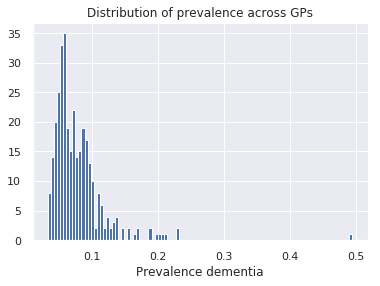

In [244]:
filtered = [k for k in presc_Disease_prevalence_area['201009']['depression'].values() if not np.isnan(k)]
plt.hist(filtered,bins=100)
ax = plt.gca()
ax.set_title("Distribution of prevalence across GPs")
ax.set_xlabel("Prevalence dementia")
ax.set_ylabel("")

In [370]:
Area_Gt = pd.read_csv('../BL_Work/prevalence_LA_method2/DM.csv')

In [371]:
Area_Gt.head()

,Unnamed: 0,Area,prevalence
0,0,Mendip,0.050852
1,1,Hastings,0.022744
2,2,Windsor and Maidenhead,0.039614
3,3,Wyre Forest,0.066761
4,4,Peterborough,0.025095


In [372]:
%store -r lon_boro

In [373]:
area_prevalence = presc_Disease_prevalence_area['201009']['diabetes']

In [374]:
presc_Disease_prevalence_area['201009'].keys()

[u'psoriasis',
 u'chronic fatigue syndrome',
 u'kidney stones',
 u'sleep apnea',
 u"crohn's disease",
 u'rheumatoid',
 u'irritable bowel syndrome',
 u'parkinsons',
 u'dysautonomia',
 u'interstitial cystitis',
 u'bipolar',
 u'dementia',
 u'hypothyroidism',
 u"Meniere's disease",
 u'multiple sclerosis',
 u'gastroparesis',
 u'depression',
 u'diabetes']

In [376]:
# %store -r gt_dict

In [335]:
# list(set(area_prevalence.keys()).intersection(Area_Gt['Area']))

In [377]:
subAreas = [k for k in lon_boro if k != 'City of London']
# subAreas = list(set(area_prevalence.keys()).intersection(Area_Gt['Area']))

In [378]:
filt_sub = list(set(area_patients.keys()).intersection(subAreas))

In [379]:
len(filt_sub)

32

In [380]:
area_prevalence

{u'Adur': 0.3688935075518841,
 u'Allerdale': 0.17666268997839538,
 u'Amber Valley': 0.5036401457169588,
 u'Arun': 0.30708103148828225,
 u'Ashfield': 0.5101491462479545,
 u'Ashford': 0.3737318408923807,
 u'Aylesbury Vale': 0.4517597464661659,
 u'Babergh': 0.33928424907631893,
 u'Barking and Dagenham': 0.30120885962673816,
 u'Barnet': 0.3844157566563476,
 u'Barnsley': 0.3343306358110179,
 u'Barrow-in-Furness': 0.23691428884323487,
 u'Basildon': 0.3214571225220453,
 u'Basingstoke and Deane': 0.3219312149544206,
 u'Bassetlaw': 0.37206142544672643,
 u'Bath and North East Somerset': 0.24222599869446573,
 u'Bedford': 0.38918080943948213,
 u'Bexley': 0.2947052694223535,
 u'Birmingham': 0.25043127169102775,
 u'Blaby': 1.0941973060741452,
 u'Blackburn with Darwen': 0.3478239153941646,
 u'Blackpool': 0.2794242924975668,
 u'Bolsover': 0.6816754240975815,
 u'Bolton': 0.3105407750917085,
 u'Boston': 0.4417910315634096,
 u'Bournemouth': 0.1859955083499292,
 u'Bracknell Forest': 0.4728173238965963,
 u

In [381]:
Area_values['Harborough']

{'patients': 508266.0, 'population': 85694}

In [365]:
predict = []
gt = []
names = []
for index, row in Area_Gt.iterrows():
    if row['Area'].strip() in filt_sub:
        if row['prevalence'] >= 0: 
#             if area_patients[row['Area'].strip()] > 400000:# and area_patients[row['Area'].strip()] < 2000000:
            predict.append(area_prevalence[row['Area']])
            names.append(row['Area'].strip())
            gt.append(row['prevalence'])
#             gt.append(gt_dict[row['Area']])

In [366]:
pearsonr(predict,gt)

(0.7196778928293253, 3.446034198641396e-06)

In [367]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': pd.Series(x), 'y':  pd.Series(y), 'val': pd.Series(val)}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

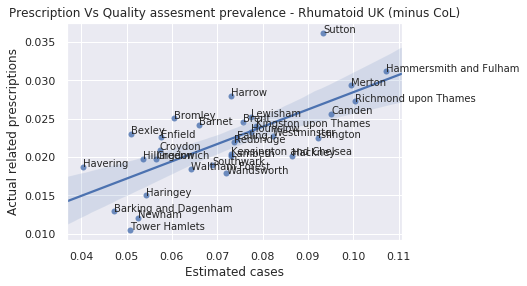

In [368]:
sns.regplot(x=predict , y = gt)
ax = plt.gca()
label_point(predict , gt , names , ax)
ax.set_title("Prescription Vs Quality assesment prevalence - Rhumatoid UK (minus CoL)")
ax.set_xlabel("Estimated cases")
ax.set_ylabel("Actual related prescriptions")